In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import time
from lmfit import Parameter, Parameters, Minimizer, fit_report
from lsst.obs.lsst import LsstCamMapper as camMapper
from lsst.obs.lsst.cameraTransforms import LsstCameraTransforms

from itertools import product

from mixcoatl.gridFitTask import GridFitTask, DistortedGrid
from mixcoatl.sourcegrid import coordinate_distances, fit_error

camera = camMapper._makeCamera()
lct = LsstCameraTransforms(camera)

## Test Partial Fit (Example 1)

2012.5987657305552 -76.01033710595232 -0.05391796475588267
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 1139
    # variables        = 3
    chi-square         = 459.869838
    reduced chi-square = 0.40481500
    Akaike info crit   = -1027.03026
    Bayesian info crit = -1011.91654
[[Variables]]
    ystep:  65.451 (fixed)
    xstep:  65.38702 (fixed)
    theta: -0.05391796 +/- 3.7323e-05 (0.07%) (init = -0.05384491)
    y0:     2012.59877 +/- 0.03582144 (0.00%) (init = 2012)
    x0:    -76.0103371 +/- 0.03108566 (0.04%) (init = -75)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, y0) = -0.731
    C(y0, x0)    =  0.164


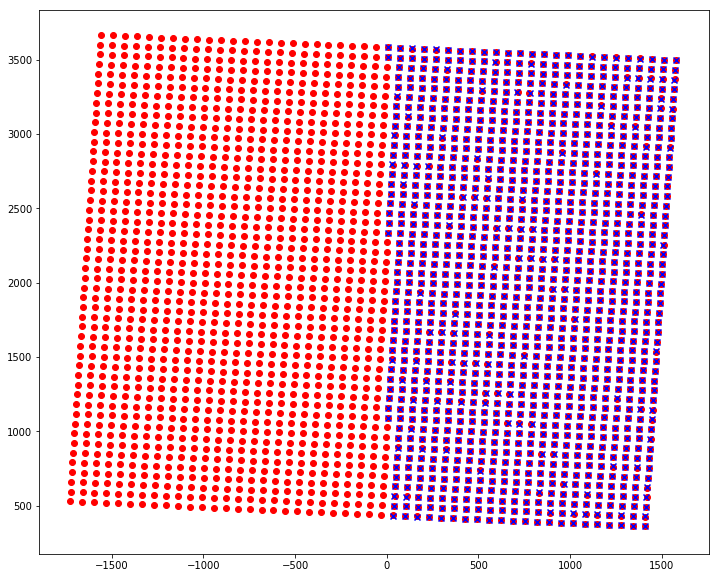

In [2]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/*.cat')
infile0 = infiles[0]
y0_guess, x0_guess = (2012., -75)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(fit_report(result0))

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/R20_S02_source_catalog.cat
2011.7353774737744 4161.706231403611 -0.05486848581944117
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 15
    # data points      = 1127
    # variables        = 3
    chi-square         = 156.935692
    reduced chi-square = 0.13962250
    Akaike info crit   = -2215.85615
    Bayesian info crit = -2200.77421
[[Variables]]
    ystep:  65.54696 (fixed)
    xstep:  65.5729 (fixed)
    theta: -0.05486849 +/- 1.6521e-05 (0.03%) (init = -0.05491732)
    y0:     2011.73538 +/- 0.01965776 (0.00%) (init = 2009.076)
    x0:     4161.70623 +/- 0.01839206 (0.00%) (init = 4159.071)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, y0) =  0.689
    C(theta, x0) =  0.209


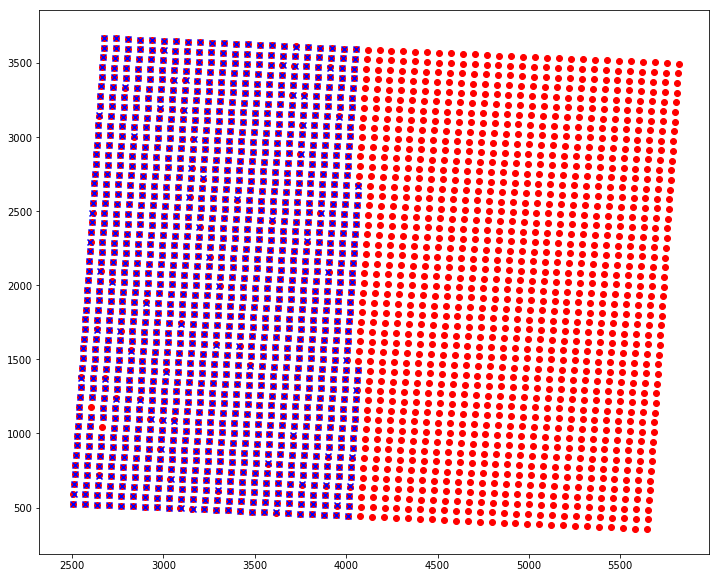

In [3]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (2020, 4170)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(fit_report(result1))

## Test Partial Fit (Example 2)

4119.299386596418 2064.398919160342 -0.05425361039908663
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 13
    # data points      = 1106
    # variables        = 3
    chi-square         = 1068.36540
    reduced chi-square = 0.96859963
    Akaike info crit   = -32.2898194
    Bayesian info crit = -17.2643038
[[Variables]]
    ystep:  65.46831 (fixed)
    xstep:  65.46451 (fixed)
    theta: -0.05425361 +/- 6.6938e-05 (0.12%) (init = -0.05496729)
    y0:     4119.29939 +/- 0.05692150 (0.00%) (init = 4110.911)
    x0:     2064.39892 +/- 0.05871096 (0.00%) (init = 2060.911)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, x0) = -0.794
    C(theta, y0) = -0.357
    C(y0, x0)    =  0.307


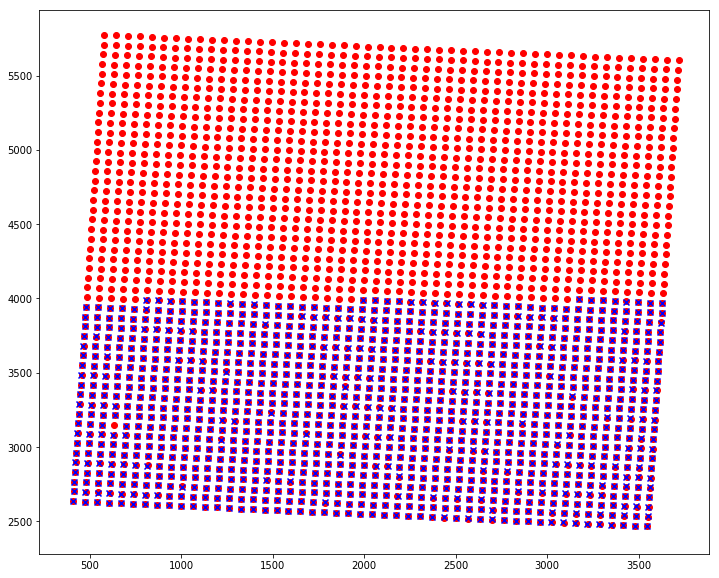

In [4]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/*.cat')
infile0 = infiles[0]
y0_guess, x0_guess = (4100, 2050)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(fit_report(result0))

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/R20_S12_source_catalog.cat
-106.91185346189643 2059.3397470664145 -0.05435839918389483
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 1119
    # variables        = 3
    chi-square         = 837.550544
    reduced chi-square = 0.75049332
    Akaike info crit   = -318.184477
    Bayesian info crit = -303.123905
[[Variables]]
    ystep:  65.48733 (fixed)
    xstep:  65.48106 (fixed)
    theta: -0.05435840 +/- 5.0378e-05 (0.09%) (init = -0.05383475)
    y0:    -106.911853 +/- 0.05001521 (0.05%) (init = -110.9146)
    x0:     2059.33975 +/- 0.04999415 (0.00%) (init = 2060.914)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, x0) =  0.779
    C(y0, x0)    = -0.125


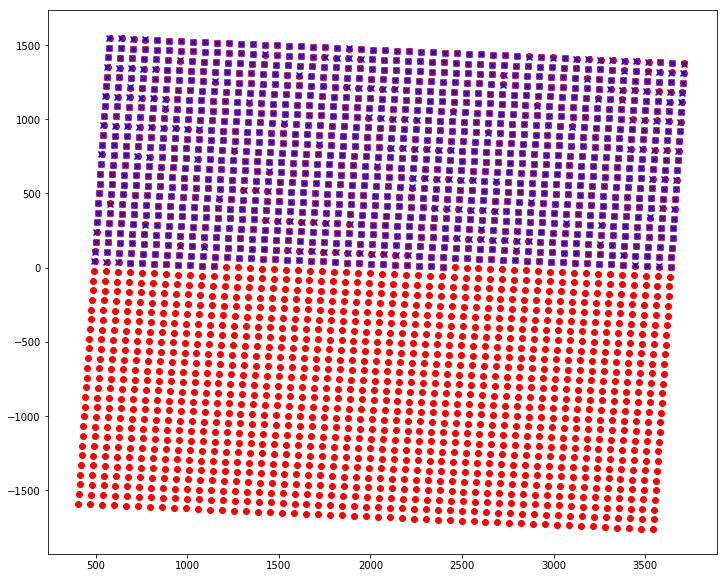

In [5]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (-100, 2050)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(fit_report(result1))

## Test Partial Fit (Example 3)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/R20_S10_source_catalog.cat
4079.51183178741 2023.4969184237282 -0.05276916196495043
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 1134
    # variables        = 3
    chi-square         = 1143.05025
    reduced chi-square = 1.01065451
    Akaike info crit   = 15.0143236
    Bayesian info crit = 30.1148431
[[Variables]]
    ystep:  65.51888 (fixed)
    xstep:  65.52234 (fixed)
    theta: -0.05276916 +/- 6.9020e-05 (0.13%) (init = -0.05338457)
    y0:     4079.51183 +/- 0.04886315 (0.00%) (init = 4079)
    x0:     2023.49692 +/- 0.04926312 (0.00%) (init = 2023)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, x0) = -0.591
    C(theta, y0) =  0.291


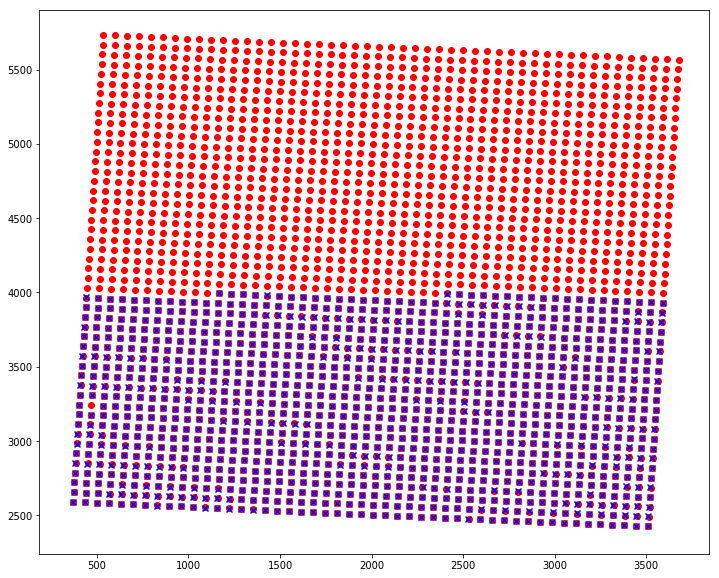

In [6]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/*.cat')
infile0 = infiles[0]
print(infile0)

y0_guess, x0_guess = (4079, 2023)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)


src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (4079, 2023))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(fit_report(result0))

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/R20_S20_source_catalog.cat


/nfs/slac/g/ki/ki19/lsst/snyder18/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/nfs/slac/g/ki/ki19/lsst/snyder18/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/nfs/slac/g/ki/ki19/lsst/snyder18/software/pymodules/mixcoatl/gridFitTask.py:68: RuntimeWarning: invalid value encountered in greater
  *(src[1].data['base_SdssCentroid_X'] > x0_guess-70*25)
/nfs/slac/g/ki/ki19/lsst/snyder18/software/pymodules/mixcoatl/gridFitTask.py:68: RuntimeWarning: invalid value encountered in less
  *(src[1].data['base_SdssCentroid_X'] > x0_guess-70*25)


-145.64554127289134 2020.9425684477944 -0.05427385110333537
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 21
    # data points      = 1067
    # variables        = 3
    chi-square         = 827.892964
    reduced chi-square = 0.77809489
    Akaike info crit   = -264.721775
    Bayesian info crit = -249.803956
[[Variables]]
    ystep:  65.54118 (fixed)
    xstep:  65.52529 (fixed)
    theta: -0.05427385 +/- 5.5998e-05 (0.10%) (init = -0.05381813)
    y0:    -145.645541 +/- 0.05076418 (0.03%) (init = -150.9235)
    x0:     2020.94257 +/- 0.05143970 (0.00%) (init = 2019.079)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, x0) =  0.775
    C(y0, x0)    = -0.215
    C(theta, y0) = -0.164


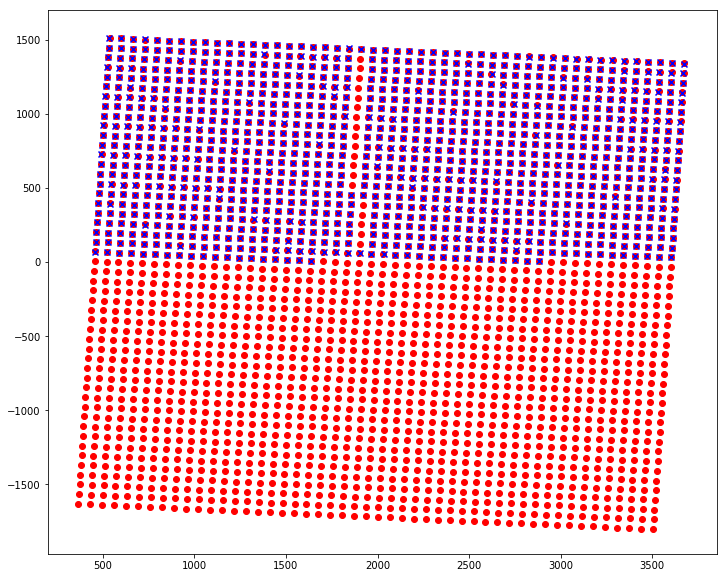

In [7]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (-140, 2030)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(fit_report(result1))

## Test Partial Fit (Example #4)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-127.0_-21.2_003/R12_S10_source_catalog.cat
1960.6685417273086 -92.24534858942248 -0.05343521981095721
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 15
    # data points      = 1127
    # variables        = 3
    chi-square         = 486.758123
    reduced chi-square = 0.43305883
    Akaike info crit   = -940.169674
    Bayesian info crit = -925.087730
[[Variables]]
    ystep:  65.31774 (fixed)
    xstep:  65.25701 (fixed)
    theta: -0.05343522 +/- 4.7123e-05 (0.09%) (init = -0.05350079)
    y0:     1960.66854 +/- 0.03972652 (0.00%) (init = 1959.114)
    x0:    -92.2453486 +/- 0.03044748 (0.03%) (init = -90.87617)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, y0) = -0.758
    C(theta, x0) = -0.168
    C(y0, x0)    =  0.156


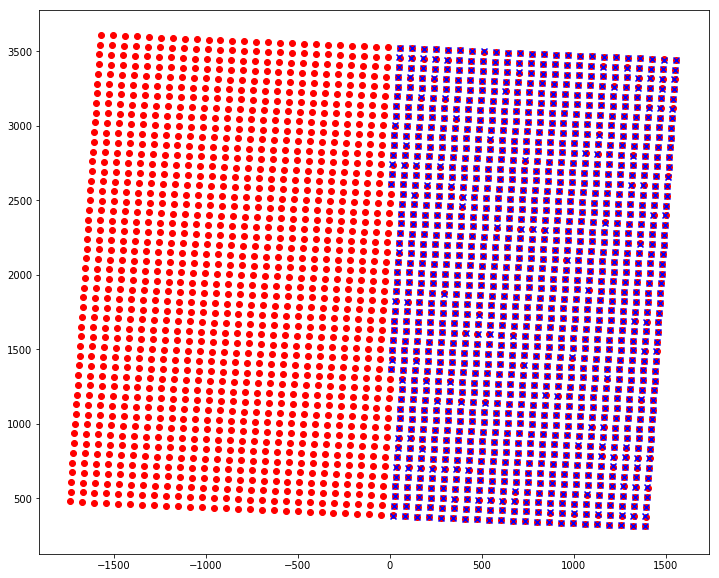

In [8]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-127.0_-21.2_003/*.cat')
infile0 = infiles[0]
print(infile0)

y0_guess, x0_guess = (1970, -80)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)


src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(fit_report(result0))

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-127.0_-21.2_003/R12_S11_source_catalog.cat
Results: y0=1962.8166673421194, x0=4130.973657284234, theta=-0.05373700152991712
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 1171
    # variables        = 3
    chi-square         = 176.809903
    reduced chi-square = 0.15137834
    Akaike info crit   = -2207.82023
    Bayesian info crit = -2192.62339
[[Variables]]
    ystep:  65.41688 (fixed)
    xstep:  65.4482 (fixed)
    theta: -0.05373700 +/- 1.6904e-05 (0.03%) (init = -0.05377573)
    y0:     1962.81667 +/- 0.01977219 (0.00%) (init = 1962.924)
    x0:     4130.97366 +/- 0.01926974 (0.00%) (init = 4130.844)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, y0) =  0.691
    C(theta, x0) =  0.196


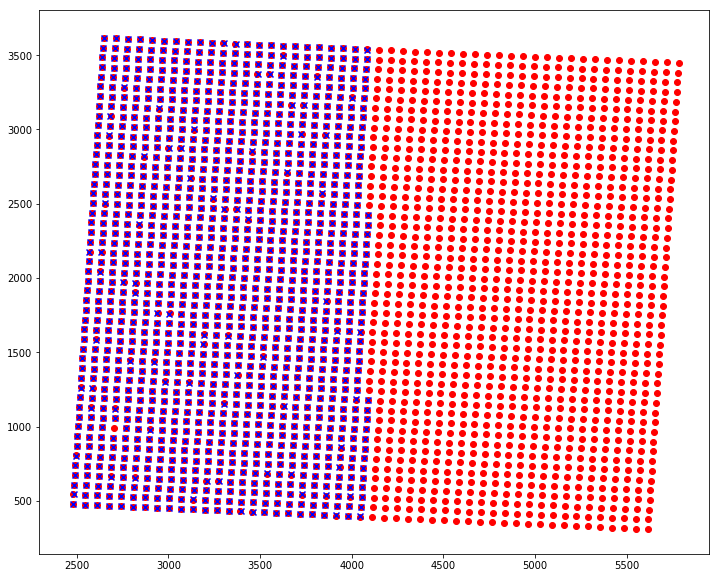

In [9]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (1962.924, 4130.844)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = False
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
#print("Initial Guess: y0={0} x0={1}".format(y0_guess, x0_guess))
print("Results: y0={0}, x0={1}, theta={2}".format(grid1.y0, grid1.x0, grid1.theta))
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(fit_report(result1))

## Test Partial Fit (Example 5)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6872D_spacing/spacing_148.6_-253.9_008/R30_S11_source_catalog.cat
4101.904807510758 2060.8497330457676 -0.05242996330287664
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 1124
    # variables        = 3
    chi-square         = 1089.63665
    reduced chi-square = 0.97202199
    Akaike info crit   = -28.8995944
    Bayesian info crit = -13.8256473
[[Variables]]
    ystep:  65.49979 (fixed)
    xstep:  65.49906 (fixed)
    theta: -0.05242996 +/- 5.3175e-05 (0.10%) (init = -0.05336175)
    y0:     4101.90481 +/- 0.05526400 (0.00%) (init = 4105)
    x0:     2060.84973 +/- 0.05251368 (0.00%) (init = 2060)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, x0) = -0.721
    C(y0, x0)    =  0.172


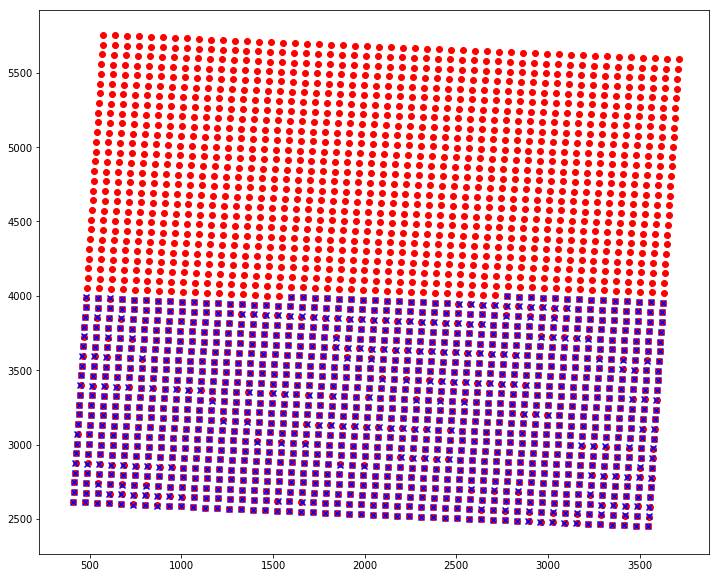

In [12]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6872D_spacing/spacing_148.6_-253.9_008/*.cat')
infile0 = infiles[0]
print(infile0)

y0_guess, x0_guess = (4105, 2060)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)


src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(fit_report(result0))

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6872D_spacing/spacing_148.6_-253.9_008/R30_S21_source_catalog.cat
-123.83179814732912 2061.016512360725 -0.053640135103871105
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 401
    # data points      = 1
    # variables        = 3
    chi-square         = 1.000e-250
    reduced chi-square = -inf
    Akaike info crit   = -569.646273
    Bayesian info crit = -575.646273
##  Warning: uncertainties could not be estimated:
[[Variables]]
    ystep:  65.51851 (fixed)
    xstep:  65.50628 (fixed)
    theta: -0.05364014 (init = -0.05321065)
    y0:    -123.831798 (init = -129.0802)
    x0:     2061.01651 (init = 2060)


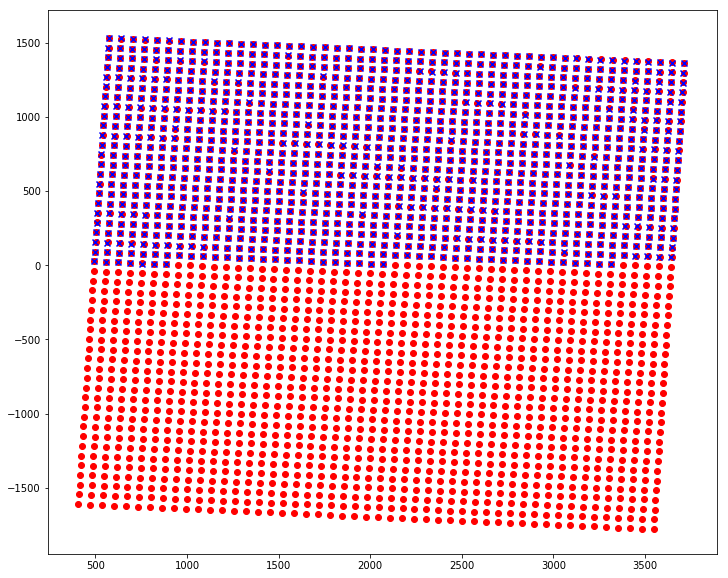

In [13]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (-140, 2060)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(fit_report(result1))

## Make Optic Distortions

In [ ]:
old_infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6865D_dither/raw_data/*.fits')

xstep = np.zeros(len(old_infiles))
ystep = np.zeros(len(old_infiles))
theta = np.zeros(len(old_infiles))

for i, infile in enumerate(old_infiles):

    with fits.open(infile) as hdul:
        ## Read input file
        hdul = fits.open(infile)
        grid_dy = hdul[1].header['DY']
        grid_dx = hdul[1].header['DX']
        grid_theta = hdul[1].header['THETA']
        
        xstep[i] = grid_dx
        ystep[i] = grid_dy
        theta[i] = grid_theta
        
mean_xstep = np.mean(xstep)
mean_ystep = np.mean(ystep)
mean_theta = np.mean(theta)

print(mean_xstep, mean_ystep, mean_theta)

In [ ]:
## Get old optic distortion file
hdul = fits.open('corrected_grid_pt_average_displacement.fits')

dx = hdul[0].data[:, 0]
dy = hdul[0].data[:, 1]

centroid_shifts = (dy, dx)

optics_grid = DistortedGrid(mean_ystep, mean_xstep, mean_theta, 0, 0, 49, 49)
optics_grid.add_centroid_shifts((dy, dx))
#optics_grid.write_fits('optics_distorted_grid.fits', overwrite=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()

ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)

In [ ]:
## Rotate by 45 degrees
optics_grid.theta += np.pi/4

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)